# Plotting with `matplotlib`

In this lab notebook you'll be introduced the basics of plotting Python using the `matplotlib` libary. Many graphics libraries are built on top of matplotlib, and have tried to make plotting even easier.  We'll explore a higher-level statistical visualization libary called [seaborn](https://seaborn.pydata.org/examples/index.html) next week. 



## How to use this notebook

This notebook is designed for you to work through at your own pace. When you're finished you should save and `commit` your changes and `push` them to your Github Classroom repository

Try experimenting by creating new code cells and playing around with the demonstrated functionality.

As you go through this notebook and work on the mini-exercises and challenge at the end, you might find the additional resources helpful:


- [Matplotlib Documentation and User Guide](https://matplotlib.org/stable/users/index)
- [Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#4.-Visualization-with-Matplotlib)
- [Matplotlib Cheatsheets](https://matplotlib.org/cheatsheets/)

# Matplotlib Key Concepts

There are a few different types of concepts in the `matplotlib.pyplot` framework.
- `Figure`: Essentially the canvas, which contains the plots
- `Axes`: An individual plot within a figure. Each Axes has a title, an x-label, and a y-label
- `Axis`: These contain the graph limits and tickmarks
- `Artist`: Everything that is visiable on the figure is an artist (e.g., Text objects, Line2D object, collection objects). Artists are typically tied to a specific Axes.

**Note**: `%matplotlib inline` in the cells below is an example of 'cell magic' and enables plotting *within* the notebook and not opening a separate window. In addition, you may want to try using `%matplotlib notebook`, which will allow more interactive plotting.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 2 interfaces for plotting

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.


### MATLAB-style interface

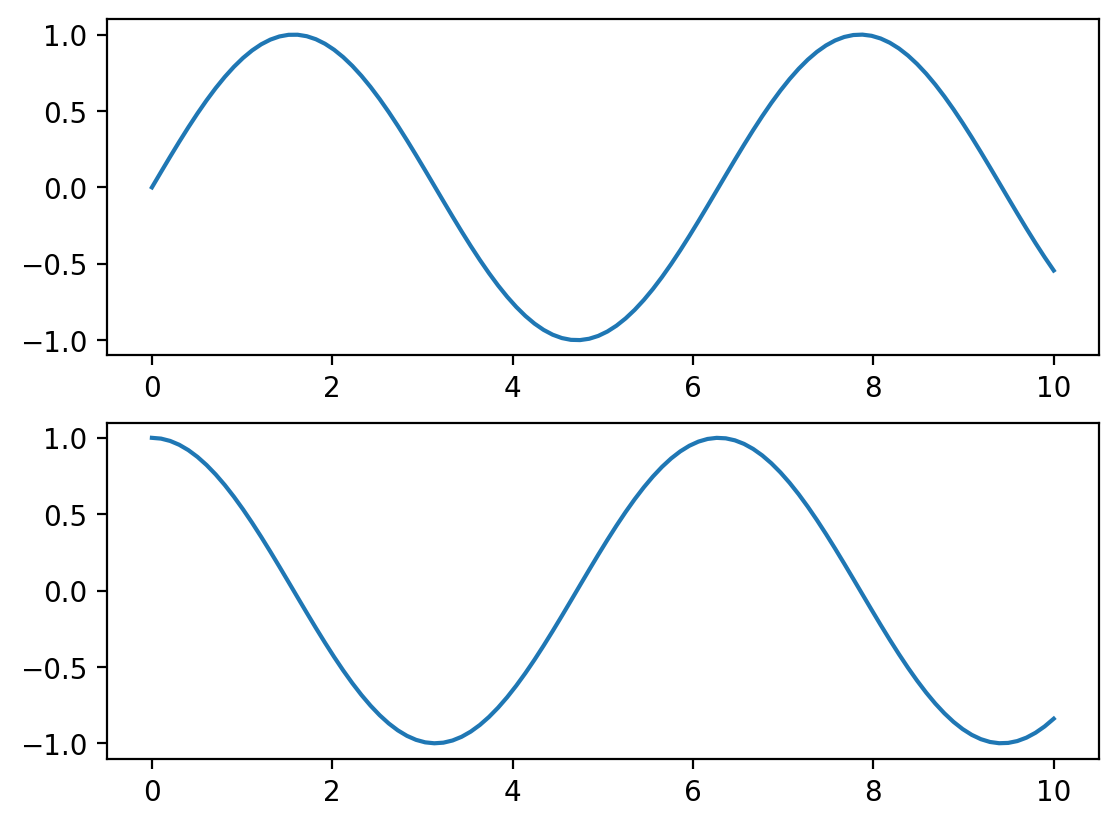

In [15]:
x = np.linspace(0, 10, 100)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the plt.gcf() (get current figure) and plt.gca() (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following:

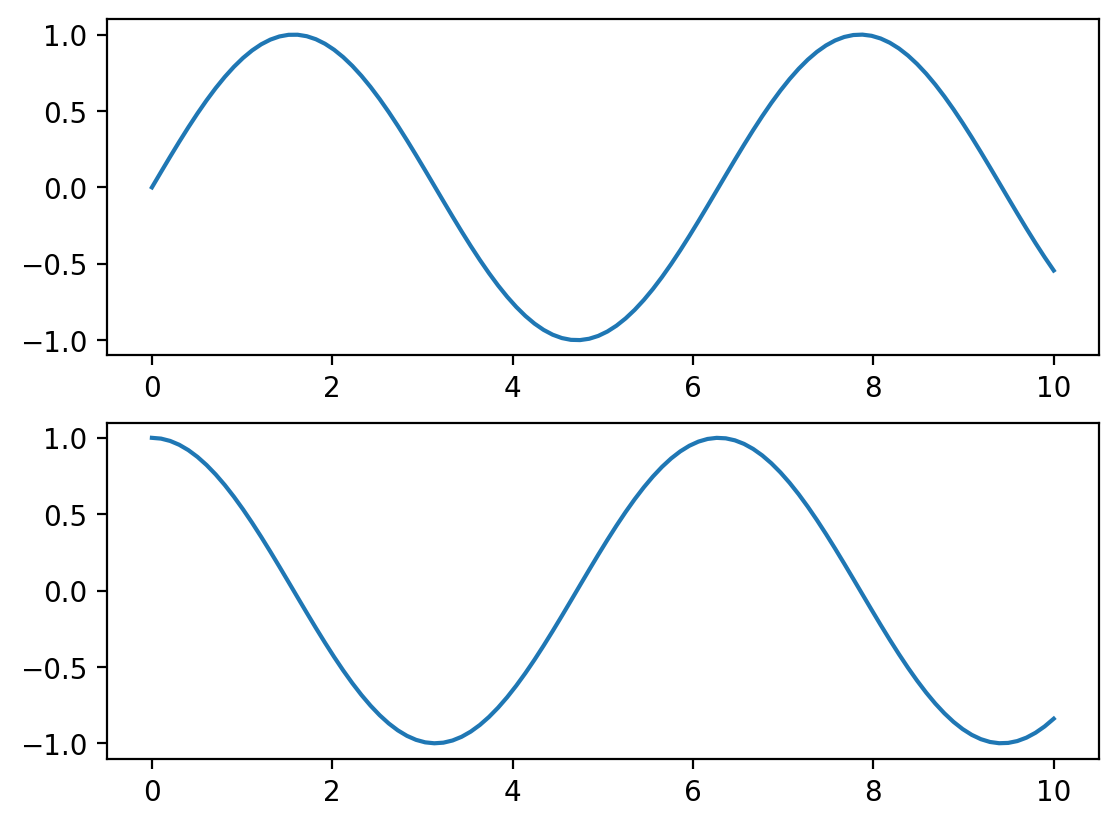

In [16]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. 

The examples below will use the MATLAB style interface to keep the code concise and easy to understand. However, you'll find yourself switching between them depending on what is most convenient. In most cases, the difference is as small as switching `plt.plot()` to `ax.plot()`, but there are a few gotchas that we will highlight as they come up in the following sections.

# Basics

**NOTE**: The basic plotting examples below make use of the MATLAB style interface

## Lineplot
First, let's generate some numbers and create a basic lineplot.

In this example, we plot:

$y = x^2$ 

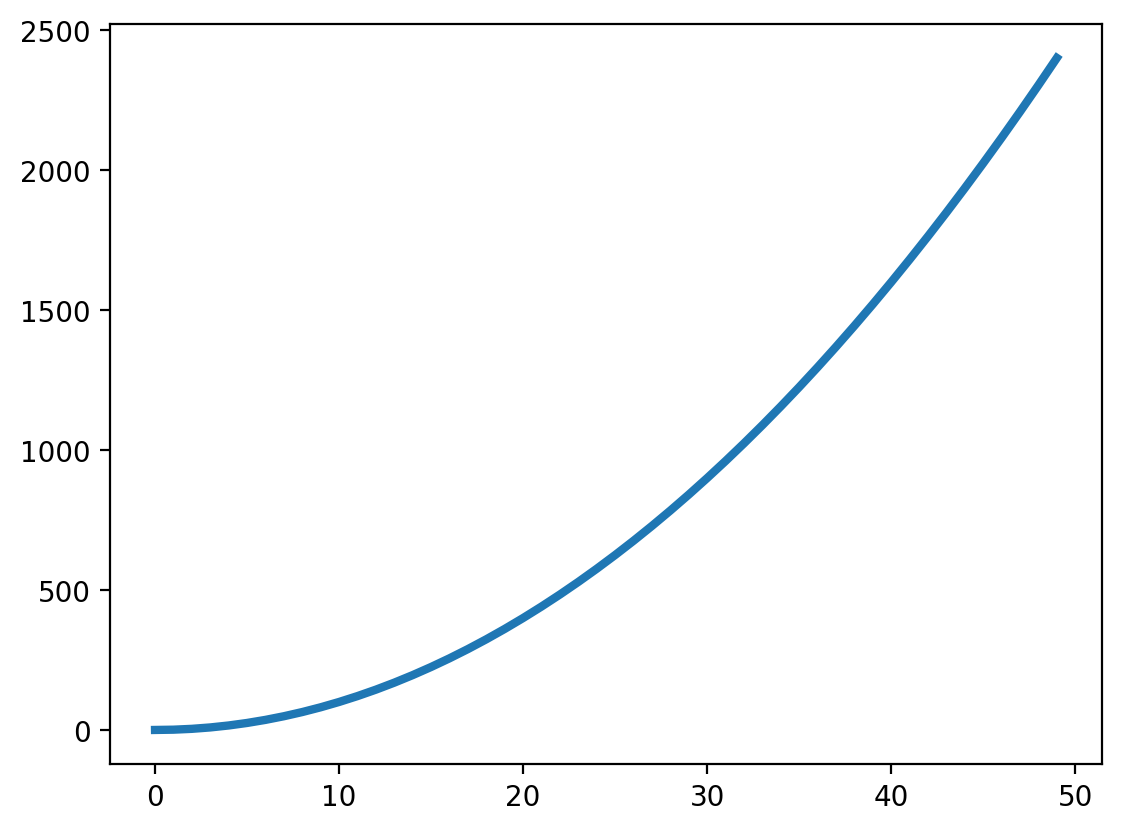

In [17]:
x = np.arange(0, 50, 1)
y = x ** 2

plt.plot(x, y, linewidth=3);

## Scatterplot
We can also plot associations between two different variables using a scatterplot. In this example, we will simulate correlated data with $\mathcal{N}(0,1)$ using `np.random.multivariate_normal` and create a scatterplot. Try playing with the covariance values to change the degree of association.



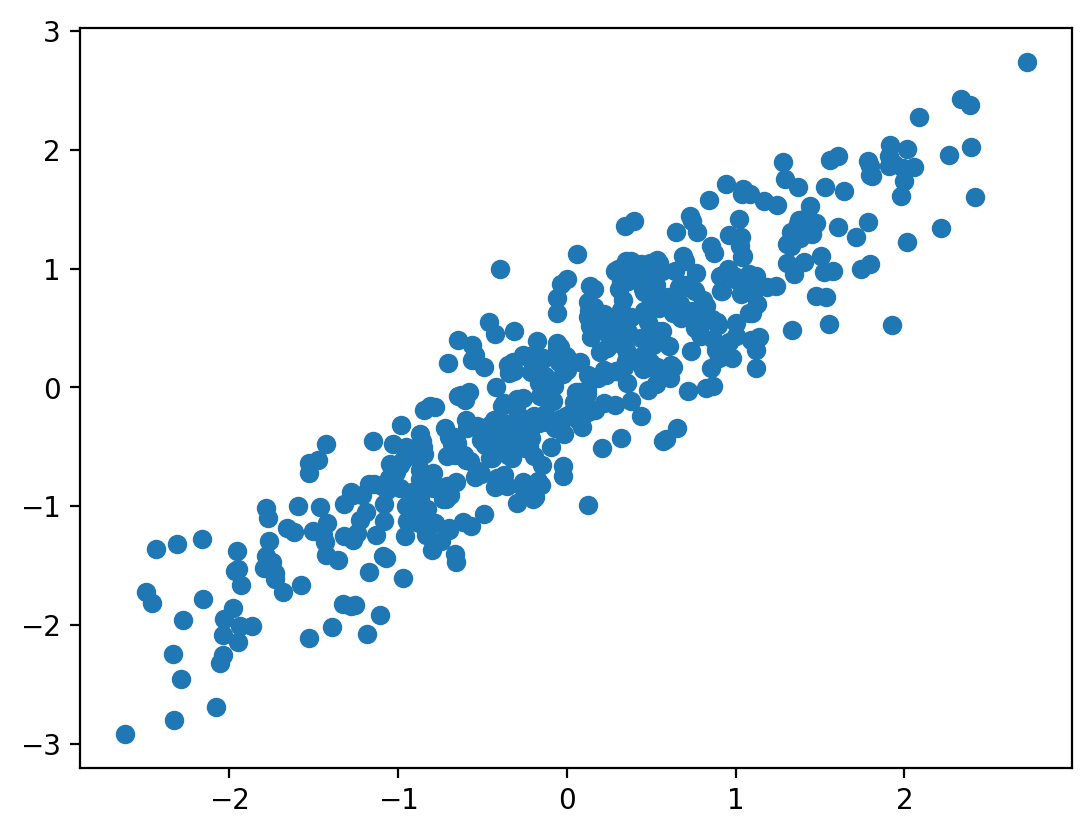

In [18]:
n = 500
r = 0.9
mu = np.array([0, 0])
cov = np.array([[1, r], [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.scatter(data[:, 0], data[:, 1]);

## Histogram
We can also plot the distribution of a variable using a histogram.

Let's see if the data we simulated above are actually normally distributed.

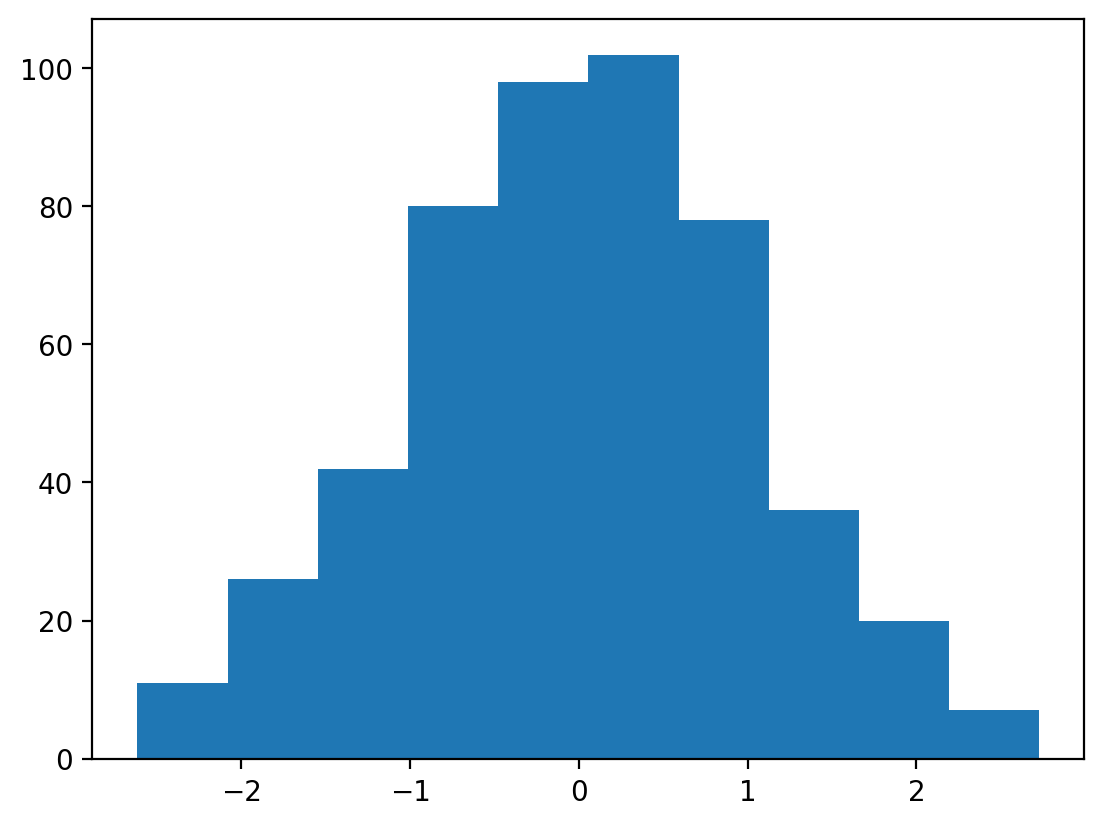

In [19]:
plt.hist(data[:,0]);

We can also plot overlaying histograms. Let's simulate more data, but shift the mean of one by 3.

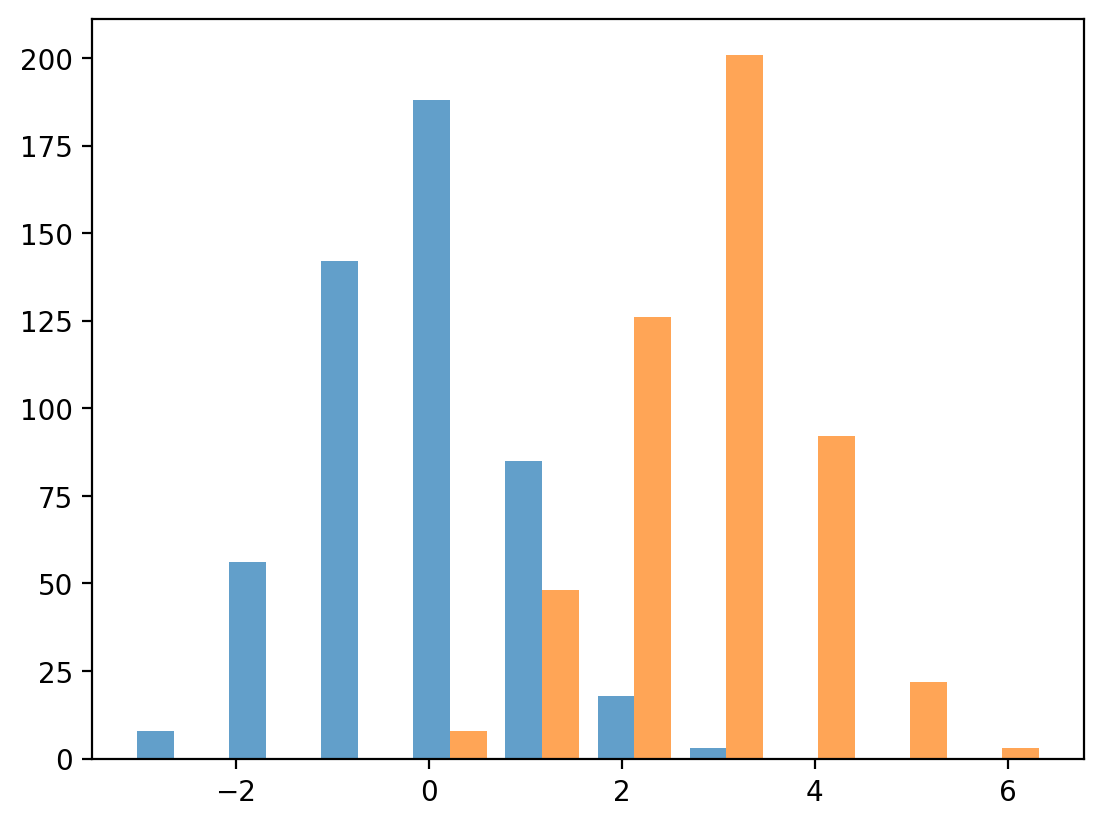

In [20]:
r = 0.9
mu = np.array([0, 3])
cov = np.array([[1, r], [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.hist(data, alpha=0.7);

## Bar Plot
We can also plot the same data as a bar plot to emphasize the difference in the means of the distributions. To create a bar plot, we need to specify the bar names and the heights of the bars.

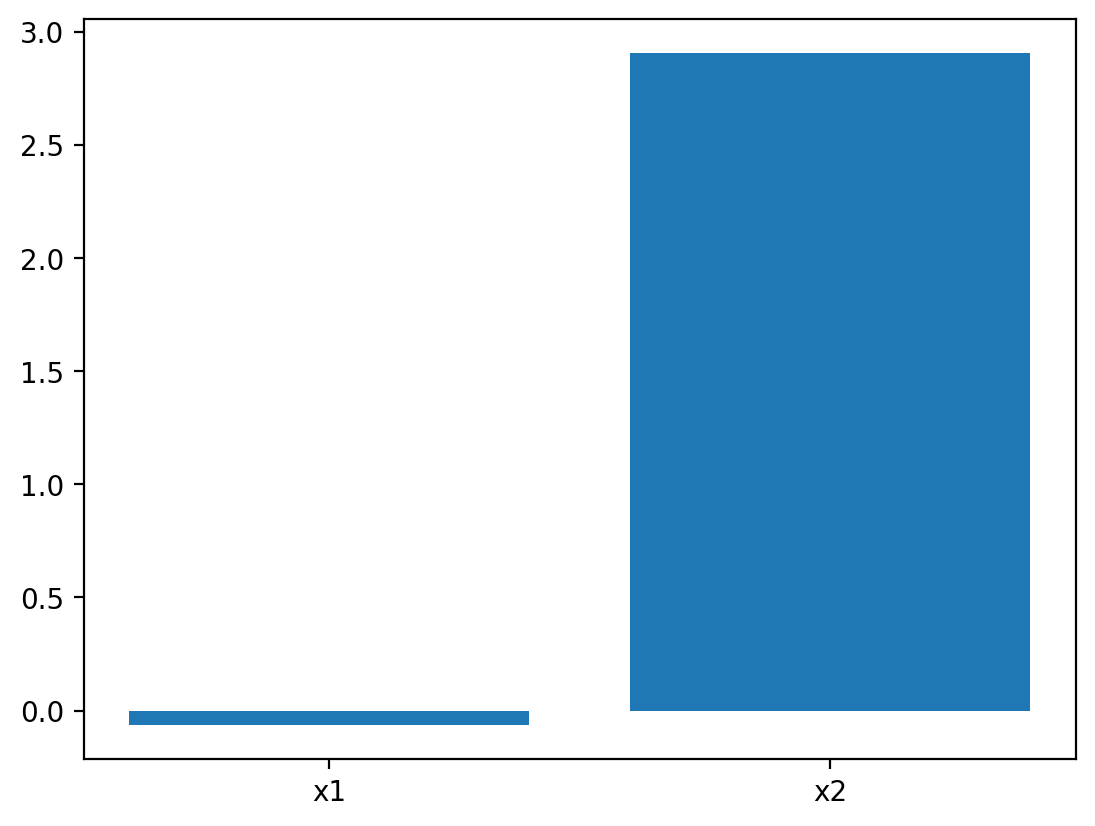

In [21]:
plt.bar(["x1", "x2"], np.mean(data, axis=0));

## 3D Plots
We can also plot in 3 dimensions with `mplot3d`. Here we will simulate 3 different variables with different correlations.

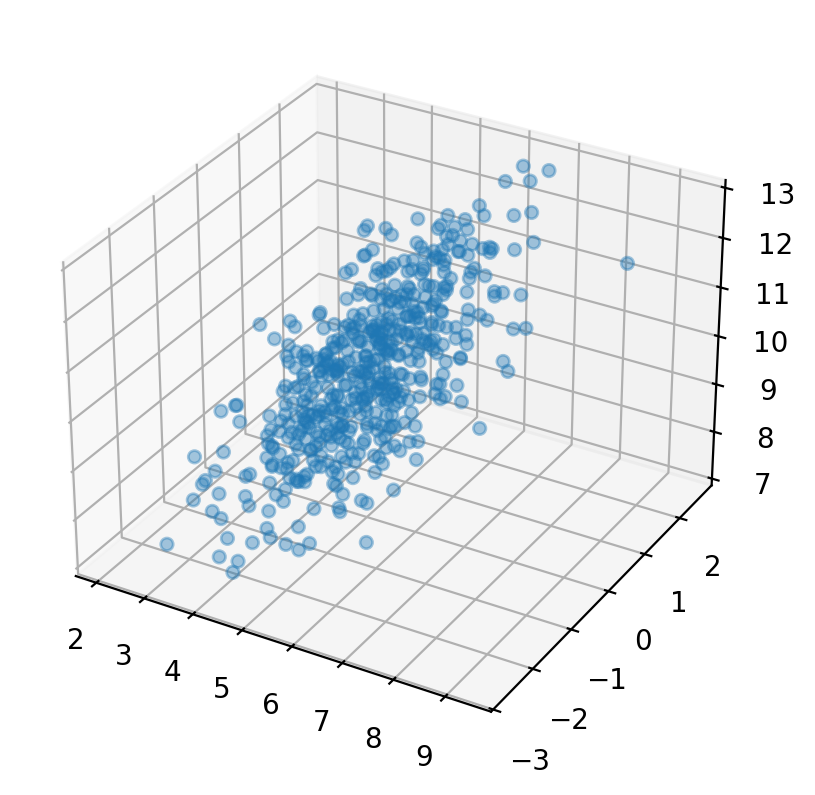

In [22]:
from mpl_toolkits import mplot3d

n = 500

r1 = .1
r2 = .5
r3 = .9

mu = np.array([5.0, 0.0, 10.0])

cov = np.array([
        [  1, r1, r2],
        [ r1,  1,  r3],
        [ r2,  r3,  1]
    ])
data = np.random.multivariate_normal(mu, cov, size=n)


ax = plt.axes(projection='3d');
ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=.4);

## Mini-exercise

Pick anyone of the plots above and try to recreate it using the *object-oriented* interface. This involves first creating the figure and axes and using the `.plot()` method on the `ax` objects to add the data.

*Hint*: check out the help and documentation for `plt.subplots()` and `ax.plot()`

In [ ]:
# Your code here

## Customization
One of the nice things about matplotlib is that everything is customizable.

Let's go back to our first scatterplot and show how we can customize it to make it easier to read. 

We can specify the type of `marker`, the `color`, the `alpha` transparency, and the size of the dots with `s`.

We can also label the axes with `xlabel` and `ylabel`, and add a `title`.

Finally, we can add text annotations, such as the strength of the correlation with `annotate`.

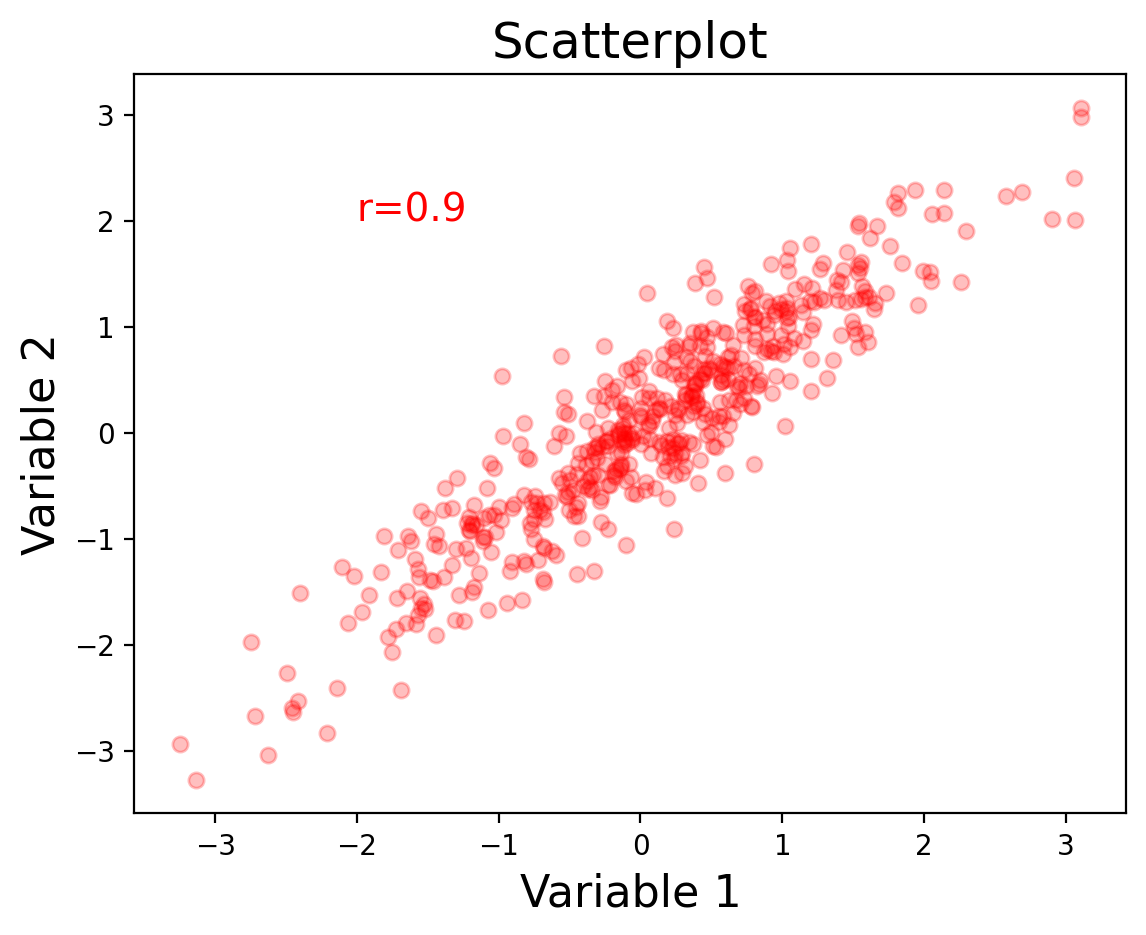

In [23]:
n = 500
r = 0.9
mu = np.array([0, 0])
cov = np.array([[1, r], [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.scatter(data[:, 0], data[:, 1], color="r", marker="o", s=30, alpha=0.25);

plt.xlabel("Variable 1", fontsize=16);
plt.ylabel("Variable 2", fontsize=16);
plt.title("Scatterplot", fontsize=18);
plt.annotate(f"r={r}", xy=(-2, 2), xycoords="data", fontsize=14, color="red");

## Layouts

The easiest way to make customized layouts that can include multiple panels of a plot are with `subplot`. 

![subplot](./subplot.png)

There are two different ways to index. One is by adding a subplot. The first number is the number of rows, the second is the number of columns, and the third is the index number.

I personally prefer to index directly into the `ax` object with rows and columns as I find it more intuitive.

You can do even more advanced layouts with panels of different sizes using [gridspec](https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html). 

Let's make our simulation code into a function and use subplots to plot multiple panels.

We specify the number of rows and columns when we initialize the plot. We can also play with the size of the plot. Here we tell matplotlib that the x and y axes will be shared across the different panels. Finally, `plt.tight_layout()` helps keep everything formatted and organized nicely.

When modifying `axes` we need to use the `set_{}` command rather than just the command itself. For example, `ax[0,0].set_xlabel('X')` rather than `plt.xlabel('X')`.

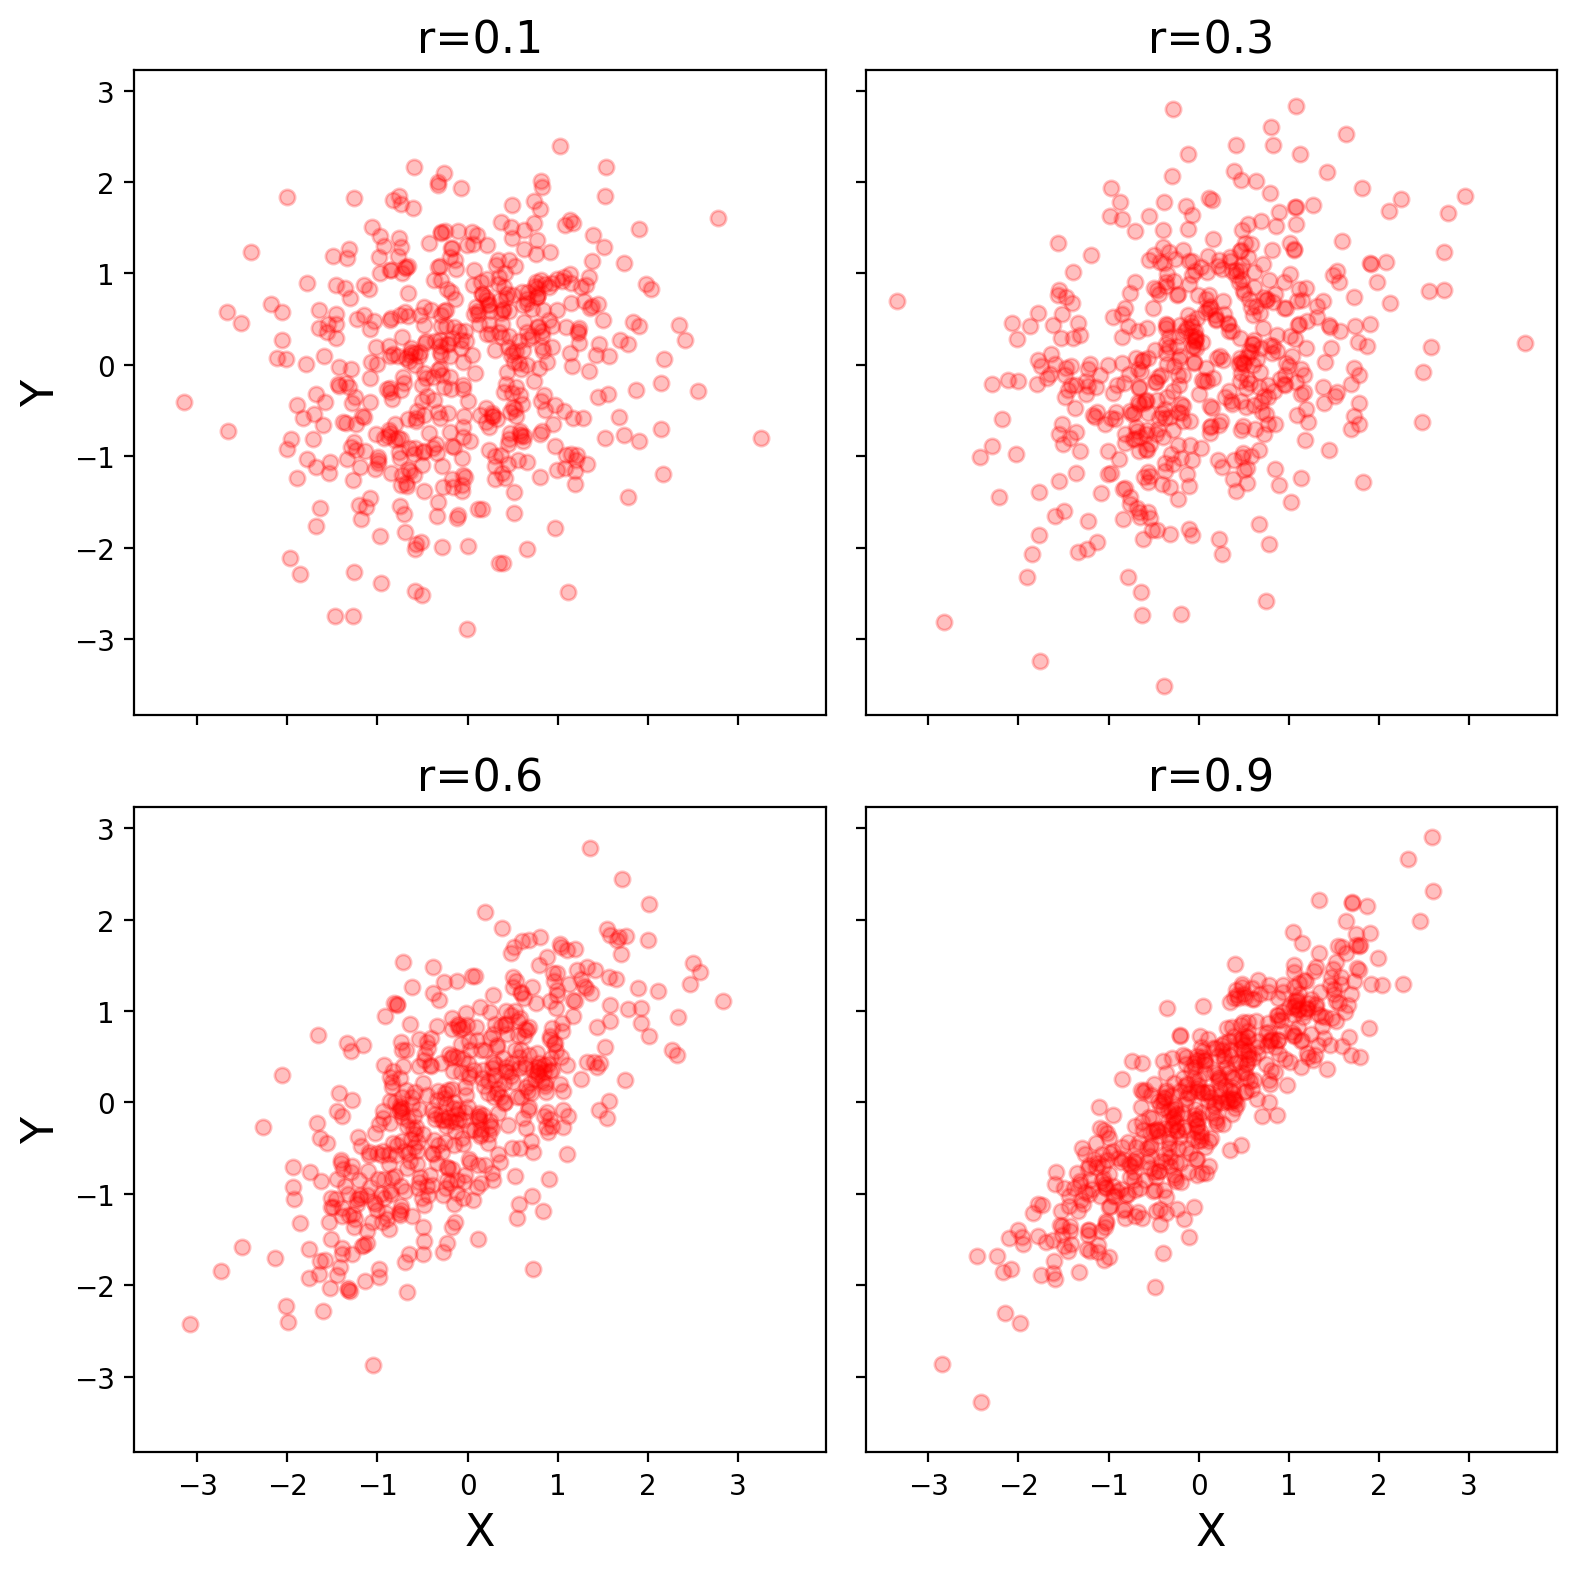

In [24]:
def simulate_xy(n=500, r=0.9):
    mu = np.array([0, 0])
    cov = np.array([[1, r], [r, 1]])
    return np.random.multivariate_normal(mu, cov, size=n)


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)

r = 0.1
sim1 = simulate_xy(n=500, r=r)
ax[0, 0].scatter(sim1[:, 0], sim1[:, 1], color="r", marker="o", s=30, alpha=0.25);
ax[0, 0].set_title(f"r={r}", fontsize=16);
ax[0, 0].set_ylabel("Y", fontsize=16);

r = 0.3
sim1 = simulate_xy(n=500, r=r)
ax[0, 1].scatter(sim1[:, 0], sim1[:, 1], color="r", marker="o", s=30, alpha=0.25);
ax[0, 1].set_title(f"r={r}", fontsize=16);

r = 0.6
sim1 = simulate_xy(n=500, r=r)
ax[1, 0].scatter(sim1[:, 0], sim1[:, 1], color="r", marker="o", s=30, alpha=0.25);
ax[1, 0].set_title(f"r={r}", fontsize=16);
ax[1, 0].set_xlabel("X", fontsize=16);
ax[1, 0].set_ylabel("Y", fontsize=16);

r = 0.9
sim1 = simulate_xy(n=500, r=r)
ax[1, 1].scatter(sim1[:, 0], sim1[:, 1], color="r", marker="o", s=30, alpha=0.25);
ax[1, 1].set_title(f"r={r}", fontsize=16);
ax[1, 1].set_xlabel("X", fontsize=16);

plt.tight_layout();


## Saving Plots
Plots can be saved to disk using the `savefig` command. There are lots of ways to customize the saved plot. I typically save rasterized versions as `.png` and vectorized versions as `.pdf`. Don't forget to specify a path where you want the file written to.

In [ ]:
plt.savefig('MyFirstPlot.png')

# Challenge Exercises 

It's impossible to show you *all* functionality that `matplotlib` has to offer, and learning its quirks can be difficult or part of the fun. Using the basic examples in the notebook and the references shared at the top try to do the following:


### 1. Use `numpy` and `matplotlib` to create a histogram of a normal distrubution

### 2. Customize the plot title to put the mean of the distribution in the title

*Hint: You can use f-strings `f"Mean = {mean}"` when setting labels in `matplotlib`

### 3. Create two 1d arrays and make a scatter plot

### 4. Customize the previous plot in the following ways:

- Use [matplotlib stylesheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) to change the plot theme to something of your choosing
- Customize the plot title, x-axis label, and y-axis labels
- Adjust the font-size of the title to be larger than the default and larger than the axis-labels


### 5. Combine the plots from steps 2 & 4 into a single figure and save it

*Hint: You can use the `plt.subplots()` function to create a figure with multiple axes. You can then use the `ax.plot()` function to plot data on each axis.*

**Note** Make sure to `git add` your `.png` file and `commit` it before you push your changes to Github Classroom!
